## K-Means Clustering

In [1]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
# 讀取城市經緯度
X = []
f = open("city.txt",encoding="utf-8")
for v in f:
    X.append([float(v.split(",")[2]), float(v.split(",")[3])])

In [13]:
X

[[39.55, 116.24],
 [26.05, 119.18],
 [25.58, 119.31],
 [27.06, 119.39],
 [25.42, 119.23],
 [27.03, 118.2],
 [27.21, 118.07],
 [24.49, 118.35],
 [24.26, 117.48],
 [25.06, 117.01],
 [24.57, 118.23],
 [26.38, 118.1],
 [26.39, 119.31],
 [24.26, 119.01],
 [24.56, 118.36],
 [26.13, 117.36],
 [27.2, 117.29],
 [24.44, 118.38],
 [27.46, 118.02],
 [24.27, 118.06],
 [25.58, 117.23],
 [25.17, 117.24],
 [24.31, 117.39],
 [36.04, 103.51],
 [36.33, 104.12],
 [40.08, 94.41],
 [39.48, 98.14],
 [38.28, 102.1],
 [39.44, 98.31],
 [35.37, 103.12],
 [35.32, 106.4],
 [34.37, 105.42],
 [37.56, 102.39],
 [35.45, 107.4],
 [39.49, 97.35],
 [38.56, 100.26],
 [23.08, 113.14],
 [23.16, 116.36],
 [23.4, 116.38],
 [23.28, 116.46],
 [23.33, 113.33],
 [23.02, 113.45],
 [22.12, 112.19],
 [23.02, 113.06],
 [22.53, 112.5],
 [23.02, 112.26],
 [21.54, 110.5],
 [22.46, 112.57],
 [23.43, 114.41],
 [23.23, 113.12],
 [21.39, 110.37],
 [22.48, 114.28],
 [23.05, 114.22],
 [22.35, 113.04],
 [22.32, 116.21],
 [22.22, 112.4],
 [25.0

In [14]:
# 轉換成numpy array
X = np.array(X)

In [15]:
X

array([[  39.55,  116.24],
       [  26.05,  119.18],
       [  25.58,  119.31],
       ..., 
       [  29.18,  106.16],
       [  29.1 ,  107.05],
       [  29.23,  105.53]])

In [16]:
# 類叢集的數量
n_clusters = 5

In [17]:
# 把資料和對應的分類數放入類函數中進行聚類
cls = KMeans(n_clusters).fit(X)

In [18]:
# X中每項所屬分類的一個類表
cls.labels_

array([2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 3, 1, 3, 1, 3, 2, 3, 3, 3, 3,
       3, 2, 1, 2, 3, 3, 3, 1, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

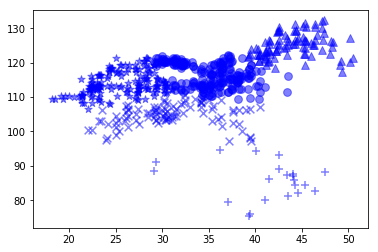

In [19]:
# plot
markers = ["^", "x", "o", "*", "+"]
for i in range(n_clusters):
    members = cls.labels_ == i
    plt.scatter(X[members, 0], X[members, 1], s = 60, marker = markers[i], c = "b", alpha = 0.5)    

plt.title("")
plt.show()

## Agglomerative Clustering

#### Ward

In [20]:
# coding = utf-8
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [21]:
# 讀取城市經緯度
X = []
f = open("city.txt",encoding = "utf-8")
for v in f:
    X.append([float(v.split(",")[2]), float(v.split(",")[3])])

In [22]:
X = np.array(X)

In [23]:
n_clusters = 5

In [24]:
# 把資料和對應的分類數放入類函數中進行聚類，使用方差最小化 "ward"
cls = AgglomerativeClustering(linkage = "ward", n_clusters = n_clusters).fit(X)

In [25]:
# X中每項所屬分類的一個列表
cls.labels_

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       4, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 4, 4, 1, 1, 4, 1, 1, 4, 4, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3,

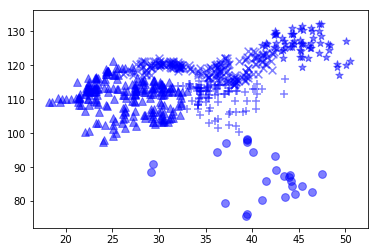

In [26]:
# plot
markers = ["^", "x", "o", "*", "+"]
for i in range(n_clusters):
    members = cls.labels_ == i
    plt.scatter(X[members, 0], X[members, 1], s = 60, marker = markers[i], c = "b", alpha = 0.5)    

plt.title("")
plt.show()

## DBSCAN

In [33]:
# coding = utf-8
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [34]:
# 國家面積人口
X = [
    [9670250, 1392358258], # 中國
    [2980000, 1247923065], # 印度
    [9629091, 317408015],  # 美國
    [8514877, 201032714],  # 巴西
    [377873, 127270000],   # 日本
    [7692024, 23540517],   # 澳大利亞
    [9984670, 34591000],   # 加拿大
    [17075400, 143551289], # 俄羅斯
    [513115, 67041000],    # 泰國
    [181035, 14805358],    # 柬埔寨
    [99600, 50400000],     # 韓國
    [120538, 24052231]     # 朝鮮
]

In [35]:
X = np.array(X)

In [36]:
# 常態化
a = X[:, :1] / 17075400.0 * 10000
b = X[:, 1:] / 1392358258.0 * 10000
X = np.concatenate((a, b), axis = 1)

In [37]:
# 把訓練資料和對應的分類放入分類器中進行訓練，沒有出現噪點是因為 min_samples = 1
cls = DBSCAN(eps = 2000, min_samples = 1).fit(X)

In [38]:
# 類叢集的數量
n_clusters = len(set(cls.labels_))

In [39]:
# X中每項所屬分類的一個列表
cls.labels_

array([0, 1, 2, 2, 3, 2, 2, 4, 3, 3, 3, 3], dtype=int64)

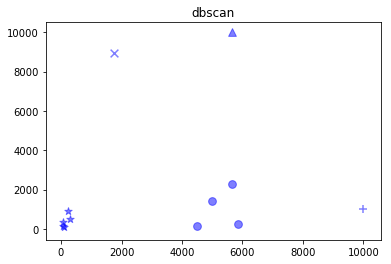

In [40]:
# plot
markers = ["^", "x", "o", "*", "+"]
for i in range(n_clusters):
    my_members = cls.labels_ == i
    plt.scatter(X[my_members, 0], X[my_members, 1], s = 60, marker = markers[i], c = "b", alpha = 0.5)    

plt.title("dbscan")
plt.show()

## Hopkins Statistic

In [64]:
# coding = utf-8
import numpy as np
from sklearn.cluster import KMeans

In [65]:
X = [
    [9670250, 1392358258], ##中國
    [2980000, 1247923065], ##印度
    [9629091, 317408015],  ##美國
    [8514877, 201032714],  ##巴西
    [377873, 127270000],   ##日本
    [7692024, 23540517],   ##澳大利亞
    [9984670, 34591000],   ##加拿大
    [17075400, 143551289], ##俄羅斯
    [513115, 67041000],    ##泰國
    [181035, 14805358],    ##柬埔寨
    [99600, 50400000],     ##韓國
    [120538, 24052231]     ##朝鮮
]

In [66]:
X = np.array(X)

In [67]:
# 做常態化
a = X[:, :1] / 17075400.0 * 10000
b = X[:, 1:] / 1392358258.0 * 10000
X = np.concatenate((a, b), axis = 1)

In [68]:
pn = X[np.random.choice(X.shape[0], 3, replace = False), :]
# 隨機挑出3個
# [[  4986.63398808,  1443.82893444],
#  [ 10000.        ,  1030.99391392],
#  [   300.49954906,   481.49245796]]

In [69]:
pn

array([[ 5847.40035373,   248.43462378],
       [ 4504.7401525 ,   169.06939622],
       [ 5639.15984399,  2279.64328273]])

In [70]:
xn = []
for i in pn:
    distance_min = 1000000
    for j in X:
        if np.array_equal(j, i):
            continue
        distance = np.linalg.norm(j - i)
        if distance_min > distance:
            distance_min = distance
    xn.append(distance_min)

In [71]:
qn = X[np.random.choice(X.shape[0], 3, replace = False), :]
# 隨機挑出3個
# [[ 4986.63398808,  1443.82893444],
#  [ 4504.7401525 ,   169.06939622],
#  [ 1745.20069808,  8962.65783486]]

In [72]:
qn

array([[   106.02094241,    106.33296362],
       [ 10000.        ,   1030.99391392],
       [  1745.20069808,   8962.65783486]])

In [73]:
yn = []
for i in qn:
    distance_min = 1000000
    for j in X:
        if np.array_equal(j, i):
            continue
        distance = np.linalg.norm(j - i)
        if distance_min > distance:
            distance_min = distance
    yn.append(distance_min)

In [74]:
H = float(np.sum(yn)) / (np.sum(xn) + np.sum(yn))
print(H)
# 0.537550924428

0.690164405565


## K-Means Clustering

m = 1 時所計算 Elbow Method 的數值

如果想計算 m 為其他值時，修改 n_clusters = 1

In [76]:
# coding = utf-8
# [面積(km^2), 人口]
X = [
    [9670250, 1392358258], # 中國
    [2980000, 1247923065], # 印度
    [9629091, 317408015],  # 美國
    [8514877, 201032714],  # 巴西
    [377873, 127270000],   # 日本
    [7692024, 23540517],   # 澳大利亞
    [9984670, 34591000],   # 加拿大
    [17075400, 143551289], # 俄羅斯
    [513115, 67041000],    # 泰國
    [181035, 14805358],    # 柬埔寨
    [99600, 50400000],     # 韓國
    [120538, 24052231]     # 朝鮮
]

In [77]:
X = np.array(X)

In [78]:
# 常態化
a = X[:, :1] / 17075400.0 * 10000
b = X[:, 1:] / 1392358258.0 * 10000
X = np.concatenate((a, b), axis = 1)

In [79]:
n_clusters = 1

In [80]:
cls = KMeans(n_clusters).fit(X)

In [81]:
# 每個叢集的中心點
cls.cluster_centers_

array([[ 3261.92812467,  2180.93620785]])

In [82]:
# X中每個點所屬的叢集
cls.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
# 曼哈頓距離
def manhattan_distance(x, y):
    return np.sum(abs(x-y))

In [84]:
distance_sum = 0

In [85]:
for i in range(n_clusters):
    group = cls.labels_ == i
    members = X[group, :]
    for v in members:
        distance_sum += manhattan_distance(np.array(v), cls.cluster_centers_)

In [86]:
print(distance_sum)
# 63538.2443905

63538.2443905


## 評估分群品質

In [139]:
# coding = utf-8
# encoding = utf-8
import numpy as np
from sklearn.cluster import KMeans

In [140]:
# [面積(km^2), 人口]
X = [
    [9670250, 1392358258], # 中國
    [2980000, 1247923065], # 印度
    [9629091, 317408015],  # 美國
    [8514877, 201032714],  # 巴西
    [377873, 127270000],   # 日本
    [7692024, 23540517],   # 澳大利亞
    [9984670, 34591000],   # 加拿大
    [17075400, 143551289], # 俄羅斯
    [513115, 67041000],    # 泰國
    [181035, 14805358],    # 柬埔寨
    [99600, 50400000],     # 韓國
    [120538, 24052231]     # 朝鮮
]

In [141]:
X = np.array(X)

In [142]:
a = X[:, :1] / 17075400.0 * 10000
b = X[:, 1:] / 1392358258.0 * 10000
X = np.concatenate((a, b), axis = 1)

In [143]:
n_clusters = 3

In [144]:
cls = KMeans(n_clusters).fit(X)

In [145]:
cls.cluster_centers_

array([[ 6195.58686766,  1034.39403022],
       [ 3704.23240451,  9481.32891743],
       [  151.34766975,   407.32130164]])

In [146]:
cls.labels_

array([1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2])

In [147]:
# 曼哈頓距離
def manhttan_distance(x, y):
    return np.sum(abs(x-y))

In [148]:
# a(v), X[0] 到其他點的平均距離
distance_sum = 0
for v in X[1:]:
    distance_sum += manhattan_distance(np.array(X[0]), np.array(v))
av = distance_sum / len(X[1:])

In [149]:
print(av)
# 11971.5037823

11971.5037823


In [150]:
# b(v), X[0]
distance_min = 10000
for i in range(n_clusters):
    group = cls.labels_ == i
    members = X[group, :]
    for v in members:
        if np.array_equal(v, X[0]):
            continue
        distance = manhattan_distance(np.array(v), cls.cluster_centers_)
        if distance_min > distance:
            distance_min = distance
bv = distance_sum / n_clusters
print(bv)
# 43895.5138683

43895.5138683


In [151]:
sv = float(bv - av) / max(av, bv)
print(sv)
# 更改 n_clusters = 3 查看輪廓係數(Silhouette Coefficient)
# 0.818181818182 (n_clusters = 2)
# 0.727272727273 (n_clusters = 3)
# 0.545454545455 (n_clusters = 5)
# 0.363636363636 (n_clusters = 7)

0.727272727273
